In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
248,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
249,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
250,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
251,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj Close  253 non-null    float64       
 6   Volume     253 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [ ]:
data = df[['Adj Close', 'Open', 'Volume']]

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Predicting 'Adj Close'
    return np.array(x), np.array(y)

SEQ_LEN = 60
x, y = create_sequences(scaled_data, SEQ_LEN)

In [ ]:
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.0000e+00 - loss: 0.9398 - val_accuracy: 0.0256 - val_loss: 0.6595
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.0000e+00 - loss: 0.5780 - val_accuracy: 0.0256 - val_loss: 0.4721
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.0000e+00 - loss: 0.6017 - val_accuracy: 0.0256 - val_loss: 0.4842
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.0000e+00 - loss: 0.5879 - val_accuracy: 0.0256 - val_loss: 0.5606
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.0000e+00 - loss: 0.5719 - val_accuracy: 0.0256 - val_loss: 0.6394


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step


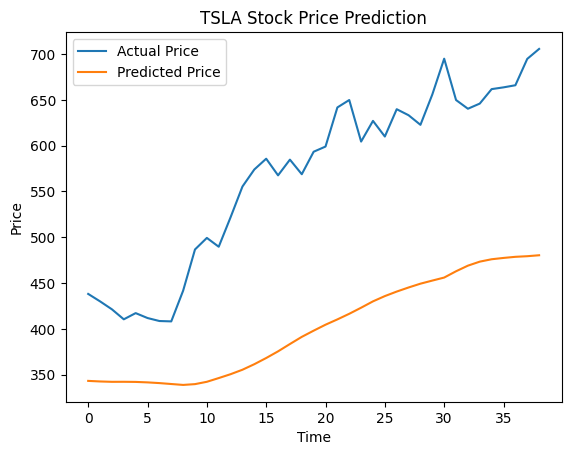

In [ ]:
import matplotlib.pyplot as plt

predicted = model.predict(x_test)
predicted_prices = scaler.inverse_transform(np.concatenate((predicted, np.zeros((len(predicted), 2))), axis=1))[:,0]
actual_prices = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((len(y_test), 2))), axis=1))[:,0]

plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("TSLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
